<font size=5>**Prediction of Remaining Useful Lifetime for Turbofan Engine**</font>

---

**Project overview :**

The main aim of this project is to implement a ML model that can be used to perform predictive maintenance on turbofan engine. The predictive maintenance approach used here is a data-driven approach, meaning that data collected from the operational jet engine is used to perform predictive maintenance modeling. To be specific, the project aim is to build a predictive model to estimate the Remaining Useful Life (RUL) of a jet engine based on run-to-failure data.

**Dataset source :** 
> - [PHM08 Challenge Data Set](https://ti.arc.nasa.gov/tech/dash/groups/pcoe/prognostic-data-repository/)
> - [Turbofan Engine Degradation Simulation Data Set](https://ti.arc.nasa.gov/tech/dash/groups/pcoe/prognostic-data-repository/)

In [1]:
import glob
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib notebook
%matplotlib inline

# to display all the columns of the dataframe in the notebook
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore")

### Load datasets

In [2]:
path_to_raw = '../data/raw/CMAPSSData/'
# path_to_processed = '../data/processed/train/'

# get all train dataset filenames
raw_files = sorted(glob.glob(path_to_raw+'train/*'))
raw_files_test = sorted(glob.glob(path_to_raw+'test/*'))

In [3]:
raw_files, raw_files_test

(['../data/raw/CMAPSSData/train/train_FD001.txt',
  '../data/raw/CMAPSSData/train/train_FD002.txt',
  '../data/raw/CMAPSSData/train/train_FD003.txt',
  '../data/raw/CMAPSSData/train/train_FD004.txt'],
 ['../data/raw/CMAPSSData/test/test_FD001.txt',
  '../data/raw/CMAPSSData/test/test_FD002.txt',
  '../data/raw/CMAPSSData/test/test_FD003.txt',
  '../data/raw/CMAPSSData/test/test_FD004.txt'])

In [4]:
# upload data
raw_data = pd.read_csv(raw_files[0], sep=' ', header=None )
raw_data_test = pd.read_csv(raw_files_test[0], sep=' ', header=None )

# drop duplicate entry
raw_data.drop_duplicates(inplace=True)
raw_data_test.drop_duplicates(inplace=True)

raw_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,21.61,551.43,2388.19,9065.52,1.3,48.07,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,NaN,NaN
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,21.61,550.86,2388.23,9065.11,1.3,48.04,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,NaN,NaN
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,21.61,550.94,2388.24,9065.90,1.3,48.09,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,NaN,NaN
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,21.61,550.68,2388.25,9073.72,1.3,48.39,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,NaN,NaN


In [5]:
raw_data_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,21.61,553.90,2388.04,9050.17,1.3,47.20,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,NaN,NaN
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,21.61,554.85,2388.01,9054.42,1.3,47.50,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,NaN,NaN
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,21.61,554.11,2388.05,9056.96,1.3,47.50,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,NaN,NaN
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,21.61,554.07,2388.03,9045.29,1.3,47.28,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,NaN,NaN
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,21.61,554.16,2388.01,9044.55,1.3,47.31,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,21.61,553.41,2388.02,9142.37,1.3,47.69,520.69,2388.00,8213.28,8.4715,0.03,394,2388,100.0,38.65,23.1974,NaN,NaN
13092,100,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,21.61,553.22,2388.05,9140.68,1.3,47.60,521.05,2388.09,8210.85,8.4512,0.03,395,2388,100.0,38.57,23.2771,NaN,NaN
13093,100,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,21.61,553.04,2388.11,9146.81,1.3,47.57,521.18,2388.04,8217.24,8.4569,0.03,395,2388,100.0,38.62,23.2051,NaN,NaN
13094,100,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,21.61,553.37,2388.07,9148.85,1.3,47.61,521.33,2388.08,8220.48,8.4711,0.03,395,2388,100.0,38.66,23.2699,NaN,NaN


In [6]:
# drop empty columns (last 2 colums)
raw_data.dropna(axis=1, inplace=True)
raw_data_test.dropna(axis=1, inplace=True)

# header
header = [  'engine_id', 'time_cycle','op_set_1', 'op_set_2', 'op_set_3', 
            'sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5', 
            'sensor_6', 'sensor_7', 'sensor_8', 'sensor_9', 'sensor_10', 
            'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15', 
            'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19', 'sensor_20', 
            'sensor_21'
         ]

# rename header
raw_data.set_axis(labels=header, axis=1, inplace=True)
raw_data_test.set_axis(labels=header, axis=1, inplace=True)

In [7]:
raw_data

,engine_id,time_cycle,op_set_1,op_set_2,op_set_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,21.61,551.43,2388.19,9065.52,1.3,48.07,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,21.61,550.86,2388.23,9065.11,1.3,48.04,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,21.61,550.94,2388.24,9065.90,1.3,48.09,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,21.61,550.68,2388.25,9073.72,1.3,48.39,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640


### Missing values

In [8]:
# find any missing values
raw_data.isna().sum()

engine_id     0
time_cycle    0
op_set_1      0
op_set_2      0
op_set_3      0
sensor_1      0
sensor_2      0
sensor_3      0
sensor_4      0
sensor_5      0
sensor_6      0
sensor_7      0
sensor_8      0
sensor_9      0
sensor_10     0
sensor_11     0
sensor_12     0
sensor_13     0
sensor_14     0
sensor_15     0
sensor_16     0
sensor_17     0
sensor_18     0
sensor_19     0
sensor_20     0
sensor_21     0
dtype: int64

In [9]:
# find any missing values
raw_data_test.isna().sum()

engine_id     0
time_cycle    0
op_set_1      0
op_set_2      0
op_set_3      0
sensor_1      0
sensor_2      0
sensor_3      0
sensor_4      0
sensor_5      0
sensor_6      0
sensor_7      0
sensor_8      0
sensor_9      0
sensor_10     0
sensor_11     0
sensor_12     0
sensor_13     0
sensor_14     0
sensor_15     0
sensor_16     0
sensor_17     0
sensor_18     0
sensor_19     0
sensor_20     0
sensor_21     0
dtype: int64

### Compute target (Remaining Useful Lifetime, RUL)

In [10]:
# create new max_cycle df, each unit have their own max_cycle
max_cycle = raw_data.groupby('engine_id', sort=False)['time_cycle'].max().to_frame('max_cycle').reset_index()
max_cycle_test = raw_data_test.groupby('engine_id', sort=False)['time_cycle'].max().to_frame('max_cycle').reset_index()

# merge raw_data with max_cycle
df = pd.merge(raw_data, max_cycle, how='inner', on='engine_id')
df_test = pd.merge(raw_data_test, max_cycle_test, how='inner', on='engine_id')

# compute RUL
df['RUL'] = df['max_cycle'] - df['time_cycle']
df_test['RUL'] = df_test['max_cycle'] - df_test['time_cycle']

# compute Health Index (normalize RUL)
df['HI'] = df['RUL']/df['max_cycle']
df_test['HI'] = df['RUL']/df['max_cycle']

In [11]:
df.shape, df_test.shape

((20631, 29), (13096, 29))

In [12]:
df

,engine_id,time_cycle,op_set_1,op_set_2,op_set_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,max_cycle,RUL,HI
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,192,191,0.994792
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,192,190,0.989583
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,192,189,0.984375
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,192,188,0.979167
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,192,187,0.973958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,21.61,551.43,2388.19,9065.52,1.3,48.07,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,200,4,0.020000
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,21.61,550.86,2388.23,9065.11,1.3,48.04,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,200,3,0.015000
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,21.61,550.94,2388.24,9065.90,1.3,48.09,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,200,2,0.010000
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,21.61,550.68,2388.25,9073.72,1.3,48.39,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,200,1,0.005000


In [13]:
df_test

,engine_id,time_cycle,op_set_1,op_set_2,op_set_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,max_cycle,RUL,HI
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,21.61,553.90,2388.04,9050.17,1.3,47.20,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,31,30,0.994792
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,21.61,554.85,2388.01,9054.42,1.3,47.50,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,31,29,0.989583
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,21.61,554.11,2388.05,9056.96,1.3,47.50,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,31,28,0.984375
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,21.61,554.07,2388.03,9045.29,1.3,47.28,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,31,27,0.979167
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,21.61,554.16,2388.01,9044.55,1.3,47.31,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,31,26,0.973958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,21.61,553.41,2388.02,9142.37,1.3,47.69,520.69,2388.00,8213.28,8.4715,0.03,394,2388,100.0,38.65,23.1974,198,4,0.133663
13092,100,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,21.61,553.22,2388.05,9140.68,1.3,47.60,521.05,2388.09,8210.85,8.4512,0.03,395,2388,100.0,38.57,23.2771,198,3,0.128713
13093,100,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,21.61,553.04,2388.11,9146.81,1.3,47.57,521.18,2388.04,8217.24,8.4569,0.03,395,2388,100.0,38.62,23.2051,198,2,0.123762
13094,100,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,21.61,553.37,2388.07,9148.85,1.3,47.61,521.33,2388.08,8220.48,8.4711,0.03,395,2388,100.0,38.66,23.2699,198,1,0.118812


### Numerical variables

In [14]:
# make a list of numerical variables
# any column type equal to object is considered as non numerical

num_vars = [var for var in df.columns if df[var].dtypes != 'O']
num_vars_test = [var for var in df_test.columns if df_test[var].dtypes != 'O']
print('Number of numerical variables: ', len(num_vars))
print('Number of numerical variables test set: ', len(num_vars_test))

# visualise the numerical variables
# df[num_vars].head()

Number of numerical variables:  29
Number of numerical variables test set:  29


- From the above view of the dataset, we notice the variable engine_id use to identified which engine the measures were done. We will not use this variable to make our predictions.

- Variable time_cycle is used to compute RUL


In [15]:
# print(f'Number of Engine Id labels : {df.engine_id.nunique()}')

#### Continous variable

In [16]:
# make list of continuous variables
num_var_to_drop = ['engine_id']
cont_vars = [var for var in num_vars if var not in num_var_to_drop]

print(f'Number of continuous variables: {len(cont_vars)}')

Number of continuous variables: 28


In [17]:
df[cont_vars].head()

,time_cycle,op_set_1,op_set_2,op_set_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,max_cycle,RUL,HI
0,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,192,191,0.994792
1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,192,190,0.989583
2,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,192,189,0.984375
3,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,192,188,0.979167
4,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,192,187,0.973958


In [18]:
df[cont_vars].columns

Index(['time_cycle', 'op_set_1', 'op_set_2', 'op_set_3', 'sensor_1',
       'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5', 'sensor_6', 'sensor_7',
       'sensor_8', 'sensor_9', 'sensor_10', 'sensor_11', 'sensor_12',
       'sensor_13', 'sensor_14', 'sensor_15', 'sensor_16', 'sensor_17',
       'sensor_18', 'sensor_19', 'sensor_20', 'sensor_21', 'max_cycle', 'RUL',
       'HI'],
      dtype='object')

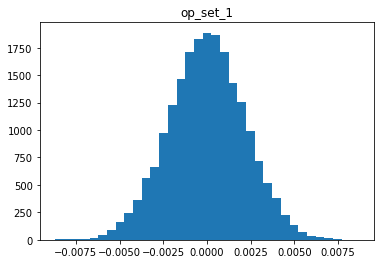

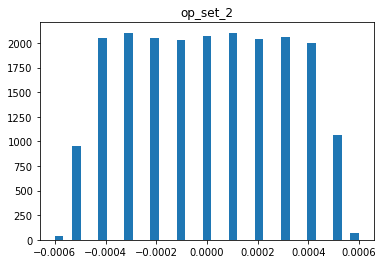

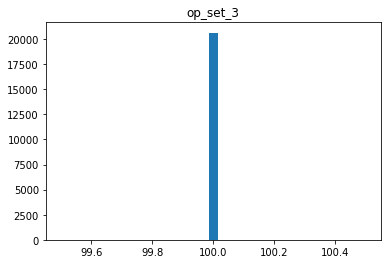

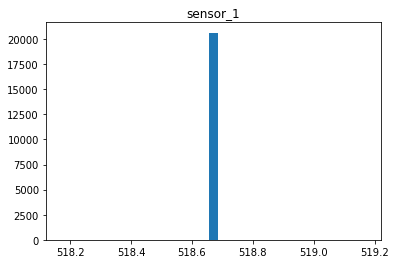

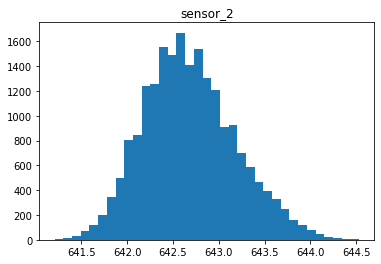

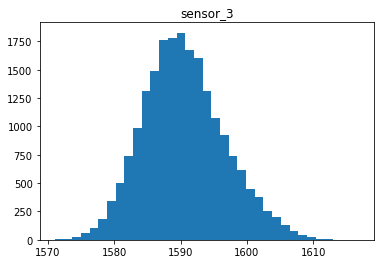

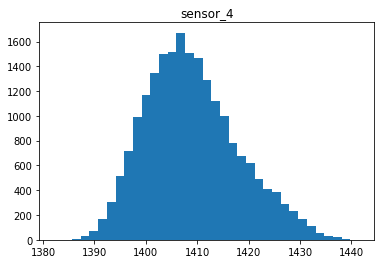

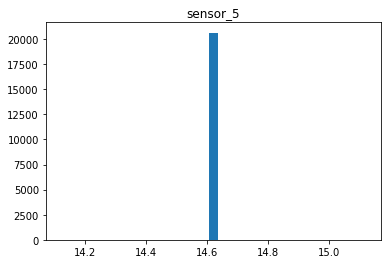

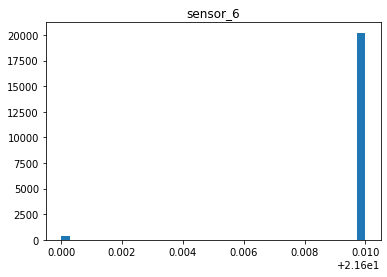

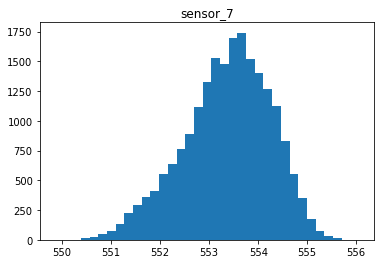

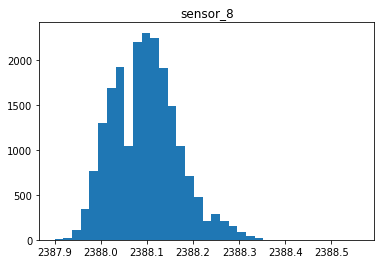

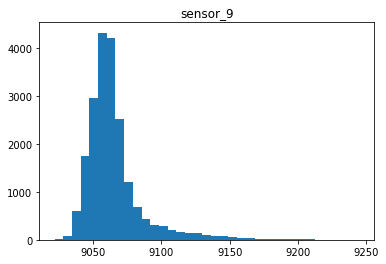

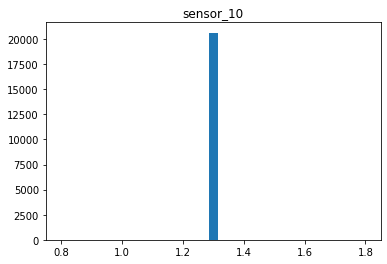

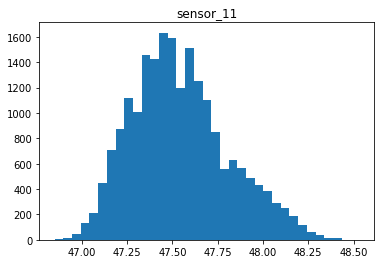

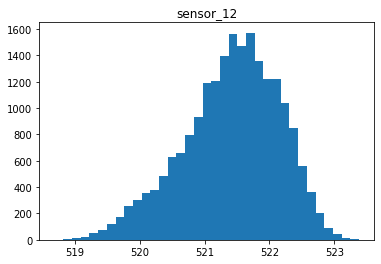

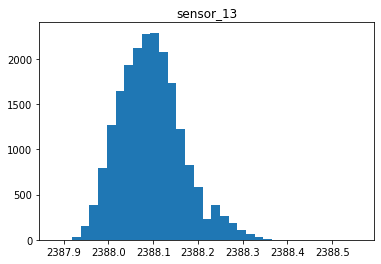

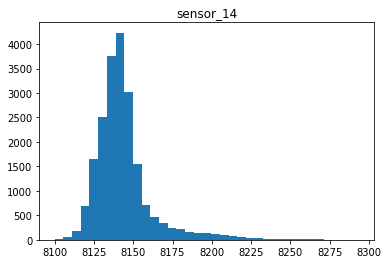

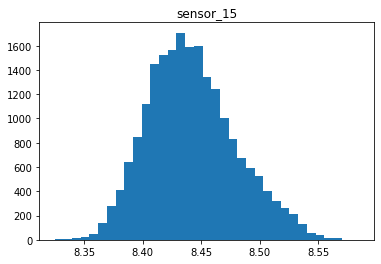

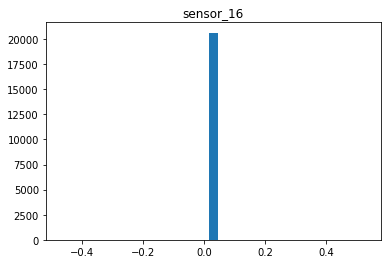

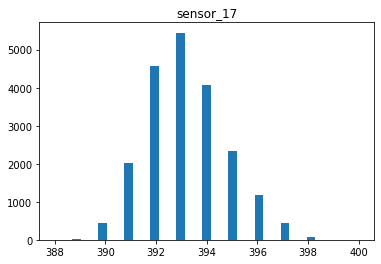

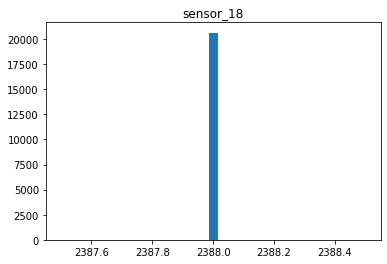

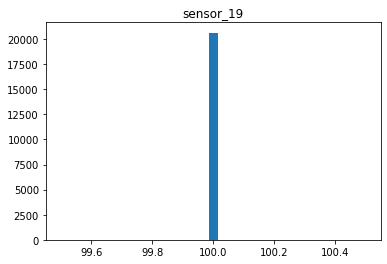

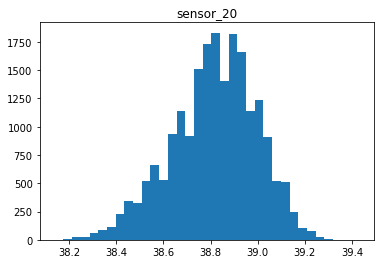

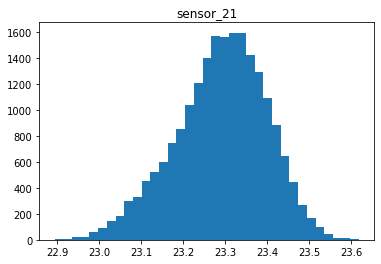

In [19]:
def plot_hist():
    for var in df[cont_vars].columns[1:-3]:
        plt.hist(df[var],bins=35)
        plt.title(var)
        plt.show()    

plot_hist()

This give us information about distribution of all sensors measurement :
> - Constant variables : ['op_set_3', 'sensor_18', 'sensor_19']
> - Quasi-constant variables : ['sensor_1', 'sensor_5', 'sensor_6', 'sensor_10', 'sensor_16']
> - Discreet variables : ['op_set_2', 'sensor_17']


#### Discreet variable

In [20]:
# def plot_scatter():
#     for var in discreet_vars:
#         sns.scatterplot(df['RUL'], df[var], hue=df['engine_id'])
#         plt.title(var)
#         plt.xlabel('RUL')
#         plt.gca().invert_xaxis()
#         plt.show()  
        

# plot_scatter()

### Max, Mean, Med & Min cycles

In [21]:
# maximum cycle engine
engine_max = df['engine_id'][df.max_cycle == df.max_cycle.max()].unique()
print(f'Engine with maximum cycle         : unit {engine_max}, {df.max_cycle.max()} cycles')

# mean cycle engine
engine_mean = df['engine_id'][df.max_cycle == int(df.max_cycle.mean())].unique()
print(f'Engine which cycle near to mean   : unit {engine_mean}, {int(df.max_cycle.mean())} cycles')

# median cycle engine
engine_med = df['engine_id'][df.max_cycle == int(df.max_cycle.median())].unique()
print(f'Engine which cycle near to median : unit {engine_med}, {int(df.max_cycle.median())} cycles')

# min cycle engine
engine_min = df['engine_id'][df.max_cycle == int(df.max_cycle.min())].unique()
print(f'Engine with minimum cycle         : unit {engine_min}, {int(df.max_cycle.min())} cycles')

# look for engines above
selected_id = [69, 15, 41, 39]
df_sel = df.loc[df['engine_id'].isin(selected_id)]

Engine with maximum cycle         : unit [69], 362 cycles
Engine which cycle near to mean   : unit [41], 216 cycles
Engine which cycle near to median : unit [15 43], 207 cycles
Engine with minimum cycle         : unit [39], 128 cycles


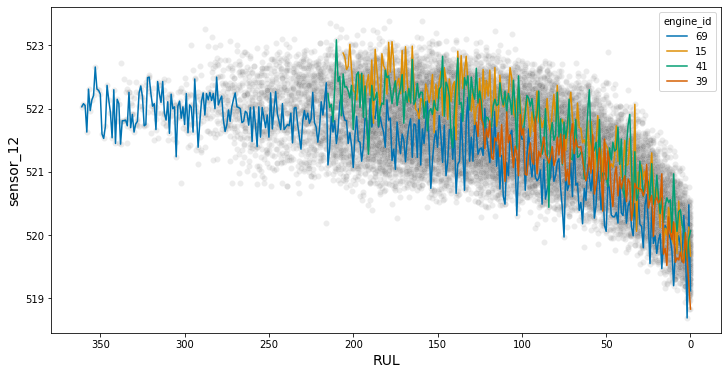

In [66]:
# plotting 
plt.figure(figsize=(12,6))
# sns.lineplot(data=df_sel, x='time_cycle', y='RUL', hue='engine_id', hue_order=[69, 15, 41, 39], palette='colorblind')
sns.scatterplot(data=df, y='sensor_12', x='RUL', color='grey', alpha=0.15)
sns.lineplot(data=df_sel, y='sensor_12', x='RUL', hue='engine_id', hue_order=[69, 15, 41, 39], palette='colorblind')
plt.gca().invert_xaxis()
# sns.scatterplot(data=df_sel, x='sensor_9', y='sensor_14', hue='engine_id', hue_order=[69, 15, 41, 39], palette='colorblind', alpha=0.35)
# sns.regplot(data=df_sel, x='sensor_9', y='sensor_14', color='red', scatter=False)
plt.ylabel('sensor_12',fontsize=14)
plt.xlabel('RUL',fontsize=14)
# plt.savefig('../reports/figures/FD001_graphs/'+'sensor_12.png')
plt.show()

In [23]:
plot_y = [col for col in df.columns]
plot_x = df.RUL

# plot functions : 
def plot_rul_vs_sensors(plot_y):
    plt.figure(figsize=(12,6))
    sns.scatterplot(data=df, y=plot_y, x=plot_x, color='grey', alpha=0.15)
#     sns.lineplot(data=df_sel, y=plot_y, x=plot_x, hue='engine_id', hue_order=[69, 15, 41, 39], palette='colorblind')
#     sns.scatterplot(data=df_sel, y=plot_y, x=plot_x, hue='engine_id', hue_order=[69, 15, 41, 39], palette='colorblind')
    plt.ylabel(plot_y, fontsize=14)
    plt.xlabel('RUL', fontsize=14)
    plt.gca().invert_xaxis()
#     plt.savefig('../reports/figures/FD001_graphs/'+plot_y+'.png')
#     plt.savefig('../reports/figures/FD001_graphs/scatter_'+plot_y+'.png')

# for y in plot_y:
#     plot_rul_vs_sensors(y)

In [24]:
!ls ../reports/figures/FD001_graphs

lineplot	       scatter_sensor_12.png  scatter_sensor_21.png
scatter_RUL.png        scatter_sensor_13.png  scatter_sensor_3.png
scatter_engine_id.png  scatter_sensor_14.png  scatter_sensor_4.png
scatter_max_cycle.png  scatter_sensor_15.png  scatter_sensor_5.png
scatter_op_set_1.png   scatter_sensor_16.png  scatter_sensor_6.png
scatter_op_set_2.png   scatter_sensor_17.png  scatter_sensor_7.png
scatter_op_set_3.png   scatter_sensor_18.png  scatter_sensor_8.png
scatter_sensor_1.png   scatter_sensor_19.png  scatter_sensor_9.png
scatter_sensor_10.png  scatter_sensor_2.png   scatter_time_cycle.png
scatter_sensor_11.png  scatter_sensor_20.png


### Pairwise correlation

<Figure size 432x288 with 0 Axes>

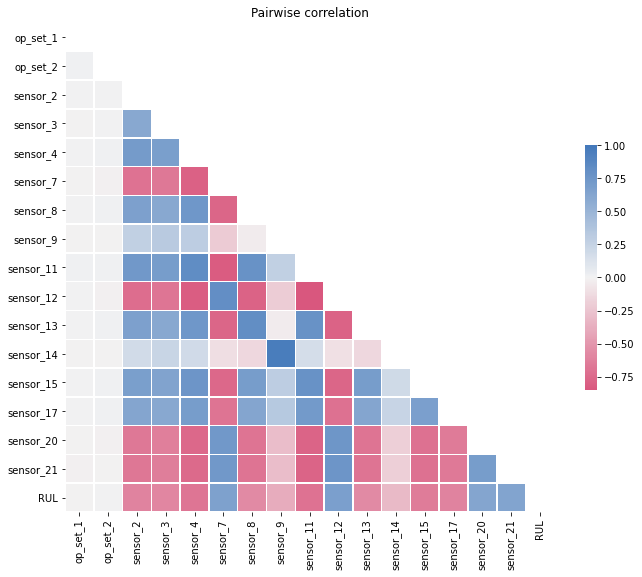

In [33]:
# id, constant, quasi-constant features to be removed
to_drop = ['engine_id', 'time_cycle', 'max_cycle']
constant_features = ['op_set_3', 'sensor_18', 'sensor_19']
quasi_cons_features = ['sensor_1', 'sensor_5', 'sensor_6', 'sensor_10', 'sensor_16']

# corr = df.drop(to_drop, axis=1).corr()
corr = df.drop(to_drop+constant_features+quasi_cons_features+['HI'], axis=1).corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure()
f, ax = plt.subplots(figsize=(11, 9))

# Set title as filename
plt.title('Pairwise correlation')

# Generate a custom diverging colormap
cmap = sns.diverging_palette(0, 250, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(data=corr, annot=False, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

#### Set treshold to 0.85

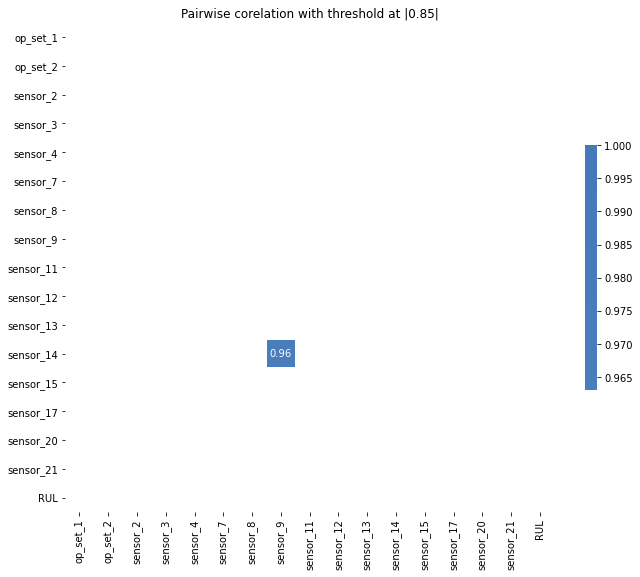

Most correlated pairwise : 


,corr_coef
sensor_9,0.963157
sensor_14,0.963157


In [35]:
# set treshold
tresh = 0.85
high_corr = corr[((corr >= tresh) | (corr <= -tresh)) & (corr !=1.000)]

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Set title as filename
plt.title('Pairwise corelation with threshold at |0.85|')

# Generate a custom diverging colormap
cmap = sns.diverging_palette(0, 250, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(high_corr, annot=True, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

print('Most correlated pairwise : ')
hc = high_corr.max().to_frame('corr_coef')
hc[hc['corr_coef'] > tresh].sort_values(by='corr_coef', ascending=False)

In [52]:
df[df['engine_id'] == 69]

,engine_id,time_cycle,op_set_1,op_set_2,op_set_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,max_cycle,RUL,HI
13631,69,1,-0.0014,-0.0001,100.0,518.67,641.96,1587.10,1400.65,14.62,21.61,553.68,2388.00,9054.19,1.3,47.34,522.03,2388.03,8136.88,8.4094,0.03,392,2388,100.0,38.87,23.4081,362,361,0.997238
13632,69,2,-0.0003,-0.0004,100.0,518.67,641.50,1594.24,1401.54,14.62,21.61,554.22,2388.04,9057.57,1.3,47.26,522.08,2388.08,8139.88,8.4172,0.03,392,2388,100.0,39.02,23.4189,362,360,0.994475
13633,69,3,0.0006,-0.0003,100.0,518.67,642.73,1585.41,1405.22,14.62,21.61,554.11,2388.04,9052.77,1.3,47.35,522.05,2388.06,8136.42,8.3869,0.03,392,2388,100.0,38.82,23.3756,362,359,0.991713
13634,69,4,-0.0001,-0.0003,100.0,518.67,642.00,1586.57,1408.44,14.62,21.61,553.84,2388.03,9061.89,1.3,47.35,521.63,2388.05,8142.92,8.3890,0.03,391,2388,100.0,38.99,23.2744,362,358,0.988950
13635,69,5,0.0026,0.0002,100.0,518.67,642.37,1582.60,1403.07,14.62,21.61,554.00,2388.06,9064.65,1.3,47.34,522.31,2388.07,8138.93,8.4042,0.03,392,2388,100.0,38.87,23.3195,362,357,0.986188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13988,69,358,0.0040,-0.0002,100.0,518.67,643.74,1609.53,1428.26,14.62,21.61,551.60,2388.20,9053.75,1.3,48.28,520.31,2388.26,8129.59,8.5460,0.03,397,2388,100.0,38.53,23.0549,362,4,0.011050
13989,69,359,0.0013,0.0003,100.0,518.67,643.46,1603.83,1429.82,14.62,21.61,551.62,2388.28,9056.81,1.3,48.13,519.86,2388.27,8131.20,8.5116,0.03,396,2388,100.0,38.28,23.0610,362,3,0.008287
13990,69,360,0.0004,-0.0001,100.0,518.67,643.97,1597.75,1428.85,14.62,21.61,551.32,2388.31,9058.88,1.3,48.14,518.69,2388.26,8126.63,8.5059,0.03,396,2388,100.0,38.47,23.0422,362,2,0.005525
13991,69,361,0.0016,-0.0002,100.0,518.67,643.65,1603.50,1433.95,14.62,21.61,551.13,2388.29,9055.52,1.3,48.09,520.48,2388.32,8132.97,8.5270,0.03,396,2388,100.0,38.52,23.1208,362,1,0.002762


(8000.0, 8400.0)

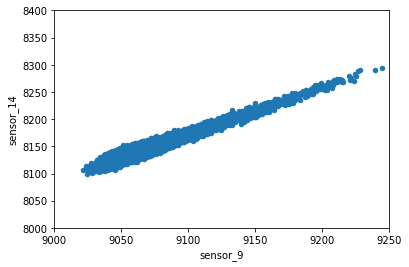

In [63]:
df.plot(kind='scatter', x='sensor_9', y='sensor_14')
plt.xlim(9000,9250)
plt.ylim(8000,8400)

(0.0, 1.0)

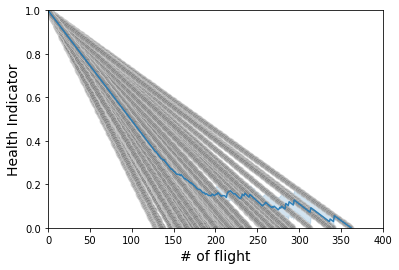

In [62]:
# df.plot(kind='scatter', y='HI', x='sensor_7')
# sns.lineplot(data=df[df['engine_id'] == 69], y='HI', x='time_cycle' )
sns.lineplot(data=df, y='HI', x='time_cycle' , alpha=0.9)
# sns.scatterplot(data=df, y='HI', x='time_cycle', color='grey', alpha=0.35)
plt.xlabel('# of flight', fontsize=14)
plt.ylabel('Health Indicator', fontsize=14)
plt.xlim(0,400)
plt.ylim(0,1)

sensor_9 = Physical Core Speed, Nc 

sensor_14 = Corrected Core Speed, NRc

We can then choose on of them since both carry quite the same information.

In [27]:
stop here

SyntaxError: invalid syntax (<ipython-input-27-a96ba3aab008>, line 1)

### Visualization

#### Maximum cycles

In [ ]:
# maximum cycle dataframe
df_max = df[['engine_id', 'max_cycle']].groupby('engine_id').max().reset_index()

plt.figure(figsize=(12,6))
plt.title('Max cycle of all 100 engines')

plt.scatter(x=df_max['engine_id'], y=df_max['max_cycle'], cmap=df_max['engine_id'], c='black')
plt.axhline(y=df_max['max_cycle'].mean(), color='r', linestyle='dotted', label='mean')

# Engine with maximum cycle         : unit [69], 362 cycles
# Engine which cycle near to mean   : unit [41], 216 cycles
# Engine which cycle near to median : unit [15 43], 207 cycles
# Engine with minimum cycle         : unit [39], 128 cycles
plt.axvline(69, ymax=362/400, color='#0173B2', label='max')
plt.axvline(41, ymax=216/400, color='#DE8F05', label='mean')
plt.axvline(15, ymax=207/400, color='#029E73', label='med')
plt.axvline(39, ymax=128/400, color='#D55E00', label='min')

plt.xlabel('engine id')
plt.ylabel('max cycle')
plt.xticks(np.arange(0, 101, step=5))
plt.xlim(0, 101)
plt.ylim(0, 400)
plt.xticks()
plt.legend()
# plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(3,6))
plt.title('Distribution')
sns.boxplot(y=df_max['max_cycle'], width=0.25)
sns.stripplot(y=df_max['max_cycle'], color='black', alpha=0.3)
plt.ylim(0,400)

#### Pairplot

In [ ]:
# sns.set(style="ticks")
# def hide_current_axis(*args, **kwds):
#     plt.gca().set_visible(False)
    
# data = df.drop(to_drop+constant_features+quasi_cons_features, axis=1)

# g = sns.PairGrid(data, diag_sharey=False)
# g.map_lower(sns.scatterplot, alpha=0.3, edgecolor='none')
# g.map_diag(sns.histplot, multiple="stack", element="step")
# g.map_upper(hide_current_axis)

#### Constant & Quasi-constant features

In [ ]:
df_cst = df[constant_features + quasi_cons_features + ['RUL', 'engine_id']]

for col in df_cst.columns[:-2]:
    plt.figure()
    plt.scatter(x=df_cst['RUL'], y=df_cst[col], alpha=0.5, s=1)
    plt.ylabel(col)
    plt.xlabel('RUL')
    plt.gca().invert_xaxis()
    plt.show()    

#### Varying features

In [ ]:
vary_features = [x for x in header if x not in constant_features] + ['RUL']

In [ ]:
vary_features

In [ ]:
df_vary = df[vary_features+['HI']]

for col in df_vary.columns[1:-1]:
    plt.figure()
    plt.scatter(x=df_vary['RUL'], y=df_vary[col], alpha=0.5, s=1)
    plt.ylabel(col)
    plt.xlabel('RUL')
    plt.gca().invert_xaxis()
    plt.show()    

In [ ]:
df_vary = df[vary_features]

for col in df_vary.columns[1:]:
    plt.figure()
    plt.scatter(x=df['HI'], y=df_vary[col], alpha=0.5, s=1)
    plt.ylabel(col)
    plt.xlabel('HI')
    plt.gca().invert_xaxis()
    plt.show()    

#### Health index

In [ ]:
selected_id = [69, 15, 41, 39]
df_ID_HI_RUL_selected = df.loc[df['engine_id'].isin(selected_id)]
df_ID_HI_RUL = df[['engine_id','HI','RUL', 'sensor_7', 'sensor_15']]

In [ ]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df_ID_HI_RUL, x='HI', y='sensor_7', color='grey', alpha=0.3)
sns.lineplot(data=df_ID_HI_RUL_selected, x='HI', y='sensor_7', hue='engine_id', palette='colorblind', )
plt.gca().invert_xaxis()
plt.show()

### Saving to data/processed

In [ ]:
raw_files

In [ ]:
path_to_processed_train = '../data/processed/train/'

# header
header = [ 'engine_id', 'time_cycle','op_set_1', 'op_set_2', 'op_set_3', 'sensor_1',
           'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5', 'sensor_6', 'sensor_7',
           'sensor_8', 'sensor_9', 'sensor_10', 'sensor_11', 'sensor_12',
           'sensor_13', 'sensor_14', 'sensor_15', 'sensor_16', 'sensor_17',
           'sensor_18', 'sensor_19', 'sensor_20', 'sensor_21'
         ]


for file in raw_files:
    
    # upload data
    raw_data = pd.read_csv(file, sep=' ', header=None, )

    # drop empty columns (last 2 cols)
    raw_data.dropna(axis=1, inplace=True)

    # drop duplicate entry
    raw_data.drop_duplicates(inplace=True)

    # rename header
    raw_data.set_axis(labels=header, axis=1, inplace=True)

    # create new max_cycle df, each unit have their own max_cycle
    max_cycle = raw_data.groupby('engine_id', sort=False)['time_cycle'].max().to_frame('max_cycle').reset_index()

    # merge raw_data with max_cycle
    df = pd.merge(raw_data, max_cycle, how='inner', on='engine_id')

    # compute RUL
    df['RUL'] = df['max_cycle'] - df['time_cycle']
    
    # compute HI
    df['HI'] = df['RUL']/df['max_cycle']
    
    # save to csv file
#     df.to_csv(path_to_processed_train+file[-9:-4]+'_processed.csv', index=False)

In [ ]:
raw_files_test

In [ ]:
path_to_processed_test = '../data/processed/test/'

# header
header = [ 'engine_id', 'time_cycle','op_set_1', 'op_set_2', 'op_set_3', 'sensor_1',
           'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5', 'sensor_6', 'sensor_7',
           'sensor_8', 'sensor_9', 'sensor_10', 'sensor_11', 'sensor_12',
           'sensor_13', 'sensor_14', 'sensor_15', 'sensor_16', 'sensor_17',
           'sensor_18', 'sensor_19', 'sensor_20', 'sensor_21'
         ]


for file in raw_files_test:
    
    # upload data
    raw_data_test = pd.read_csv(file, sep=' ', header=None, )

    # drop empty columns (last 2 cols)
    raw_data_test.dropna(axis=1, inplace=True)

    # drop duplicate entry
    raw_data_test.drop_duplicates(inplace=True)

    # rename header
    raw_data_test.set_axis(labels=header, axis=1, inplace=True)

    # create new max_cycle df, each unit have their own max_cycle
    max_cycle = raw_data_test.groupby('engine_id', sort=False)['time_cycle'].max().to_frame('max_cycle').reset_index()

    # merge raw_data_test with max_cycle
    df = pd.merge(raw_data_test, max_cycle, how='inner', on='engine_id')

    # compute RUL
    df['RUL'] = df['max_cycle'] - df['time_cycle']
    
    # compute HI
    df['HI'] = df['RUL']/df['max_cycle']
    
    # save to csv file
#     raw_data_test.to_csv(path_to_processed_test+file[-9:-4]+'_test_processed.csv', index=False)

In [ ]:
# !mkdir ../data/processed/train
# !mkdir ../data/processed/test
!tree ../data/processed/

In [ ]:
!head -n 2 ../data/processed/test/FD001_test_processed.csv

In [ ]:
!head -n 2 ../data/processed/train/FD001_processed.csv